In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_10degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((37*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((37*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(199, 100, 100)


In [17]:
print(y_test.shape)

(23, 100, 100)


In [18]:
print(x_train.shape)

(199, 15, 1)


In [19]:
print(x_test.shape)

(23, 15, 1)


In [20]:
theta_train.shape

(199,)

In [21]:
tsr_train.shape

(199,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((199, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((23, 2, 1))

In [28]:
tsr_theta_train.shape

(199, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
5/5 [==============================] - 1s 7ms/step - loss: 0.0111 - rmse: 0.1046
Epoch 2/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1038
Epoch 3/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 4/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1018
Epoch 5/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1001
Epoch 6/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0096 - rmse: 0.0973
Epoch 7/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0936
Epoch 8/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0082 - rmse: 0.0897
Epoch 9/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0872
Epoch 10/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0856
Epoch 11/10000
5/5 [=============================

5/5 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0822
Epoch 87/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0822
Epoch 88/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0821
Epoch 89/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0820
Epoch 90/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0820
Epoch 91/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0819
Epoch 92/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0819
Epoch 93/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0819
Epoch 94/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0818
Epoch 95/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 96/10000
5/5 [==============================] - 0

5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0794
Epoch 171/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 172/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 173/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0793
Epoch 174/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 175/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 176/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 177/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 178/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 179/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 180/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0751
Epoch 255/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0751
Epoch 256/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0751
Epoch 257/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0750
Epoch 258/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0750
Epoch 259/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 260/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0750
Epoch 261/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 262/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 263/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 264/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0717
Epoch 339/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0716
Epoch 340/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0715
Epoch 341/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0715
Epoch 342/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0715
Epoch 343/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0713
Epoch 344/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 345/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 346/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 347/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0711
Epoch 348/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0667
Epoch 423/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0666
Epoch 424/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 425/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 426/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0663
Epoch 427/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 428/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0660
Epoch 429/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0660
Epoch 430/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0659
Epoch 431/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 432/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 507/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 508/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 509/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 510/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0567
Epoch 511/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 512/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 513/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0564
Epoch 514/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 515/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 516/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0494
Epoch 591/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0494
Epoch 592/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 593/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 594/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 595/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 596/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 597/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 598/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 599/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0487
Epoch 600/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 675/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0430
Epoch 676/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 677/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 678/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 679/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 680/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 681/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 682/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 683/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 684/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 759/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 760/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 761/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 762/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 763/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 764/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 765/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 766/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 767/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 768/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 843/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 844/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0339
Epoch 845/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0339
Epoch 846/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 847/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 848/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 849/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 850/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 851/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 852/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 927/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 928/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 929/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 930/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 931/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 932/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 933/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 934/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 935/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 936/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 8.8782e-04 - rmse: 0.0280
Epoch 1008/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9613e-04 - rmse: 0.0282
Epoch 1009/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9460e-04 - rmse: 0.0281
Epoch 1010/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8769e-04 - rmse: 0.0280
Epoch 1011/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9123e-04 - rmse: 0.0281
Epoch 1012/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8284e-04 - rmse: 0.0279
Epoch 1013/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8406e-04 - rmse: 0.0280
Epoch 1014/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9023e-04 - rmse: 0.0281
Epoch 1015/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8121e-04 - rmse: 0.0279
Epoch 1016/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8490e-04 - rmse: 0.02

5/5 [==============================] - 0s 6ms/step - loss: 7.7118e-04 - rmse: 0.0259
Epoch 1088/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7752e-04 - rmse: 0.0260
Epoch 1089/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7887e-04 - rmse: 0.0260
Epoch 1090/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.6781e-04 - rmse: 0.0258
Epoch 1091/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.6755e-04 - rmse: 0.0258
Epoch 1092/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7913e-04 - rmse: 0.0260
Epoch 1093/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7470e-04 - rmse: 0.0260
Epoch 1094/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.6358e-04 - rmse: 0.0257
Epoch 1095/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.6379e-04 - rmse: 0.0257
Epoch 1096/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5223e-04 - rmse: 0.02

5/5 [==============================] - 0s 6ms/step - loss: 6.8110e-04 - rmse: 0.0241
Epoch 1168/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8069e-04 - rmse: 0.0241
Epoch 1169/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7324e-04 - rmse: 0.0239
Epoch 1170/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7706e-04 - rmse: 0.0240
Epoch 1171/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7963e-04 - rmse: 0.0241
Epoch 1172/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8139e-04 - rmse: 0.0241
Epoch 1173/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7839e-04 - rmse: 0.0241
Epoch 1174/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7852e-04 - rmse: 0.0241
Epoch 1175/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7029e-04 - rmse: 0.0239
Epoch 1176/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7483e-04 - rmse: 0.02

5/5 [==============================] - 0s 6ms/step - loss: 6.0819e-04 - rmse: 0.0226
Epoch 1248/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0447e-04 - rmse: 0.0225
Epoch 1249/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0206e-04 - rmse: 0.0224
Epoch 1250/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0363e-04 - rmse: 0.0225
Epoch 1251/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0698e-04 - rmse: 0.0225
Epoch 1252/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0429e-04 - rmse: 0.0225
Epoch 1253/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0841e-04 - rmse: 0.0226
Epoch 1254/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1020e-04 - rmse: 0.0226
Epoch 1255/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0869e-04 - rmse: 0.0226
Epoch 1256/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0089e-04 - rmse: 0.02

5/5 [==============================] - 0s 6ms/step - loss: 5.5928e-04 - rmse: 0.0215
Epoch 1328/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5064e-04 - rmse: 0.0213
Epoch 1329/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5241e-04 - rmse: 0.0213
Epoch 1330/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4415e-04 - rmse: 0.0211
Epoch 1331/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5453e-04 - rmse: 0.0214
Epoch 1332/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4820e-04 - rmse: 0.0212
Epoch 1333/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5098e-04 - rmse: 0.0213
Epoch 1334/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4227e-04 - rmse: 0.0211
Epoch 1335/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4259e-04 - rmse: 0.0211
Epoch 1336/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4274e-04 - rmse: 0.02

5/5 [==============================] - 0s 6ms/step - loss: 4.9875e-04 - rmse: 0.0200
Epoch 1408/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0064e-04 - rmse: 0.0201
Epoch 1409/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9844e-04 - rmse: 0.0200
Epoch 1410/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9608e-04 - rmse: 0.0200
Epoch 1411/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9640e-04 - rmse: 0.0200
Epoch 1412/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9497e-04 - rmse: 0.0199
Epoch 1413/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9907e-04 - rmse: 0.0201
Epoch 1414/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9053e-04 - rmse: 0.0198
Epoch 1415/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9005e-04 - rmse: 0.0198
Epoch 1416/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9417e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 4.5156e-04 - rmse: 0.0188
Epoch 1488/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5705e-04 - rmse: 0.0190
Epoch 1489/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5817e-04 - rmse: 0.0190
Epoch 1490/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5194e-04 - rmse: 0.0189
Epoch 1491/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5106e-04 - rmse: 0.0188
Epoch 1492/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5038e-04 - rmse: 0.0188
Epoch 1493/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5279e-04 - rmse: 0.0189
Epoch 1494/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5249e-04 - rmse: 0.0189
Epoch 1495/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5951e-04 - rmse: 0.0191
Epoch 1496/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6273e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 4.1377e-04 - rmse: 0.0178
Epoch 1568/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1166e-04 - rmse: 0.0178
Epoch 1569/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1574e-04 - rmse: 0.0179
Epoch 1570/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1538e-04 - rmse: 0.0179
Epoch 1571/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1353e-04 - rmse: 0.0178
Epoch 1572/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1310e-04 - rmse: 0.0178
Epoch 1573/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1323e-04 - rmse: 0.0178
Epoch 1574/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1618e-04 - rmse: 0.0179
Epoch 1575/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1649e-04 - rmse: 0.0179
Epoch 1576/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1465e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 3.7890e-04 - rmse: 0.0168
Epoch 1648/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8374e-04 - rmse: 0.0170
Epoch 1649/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8031e-04 - rmse: 0.0169
Epoch 1650/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7897e-04 - rmse: 0.0168
Epoch 1651/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8497e-04 - rmse: 0.0170
Epoch 1652/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9675e-04 - rmse: 0.0174
Epoch 1653/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9092e-04 - rmse: 0.0172
Epoch 1654/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8252e-04 - rmse: 0.0169
Epoch 1655/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8740e-04 - rmse: 0.0171
Epoch 1656/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8855e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 3.5231e-04 - rmse: 0.0160
Epoch 1728/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5517e-04 - rmse: 0.0161
Epoch 1729/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5290e-04 - rmse: 0.0161
Epoch 1730/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5359e-04 - rmse: 0.0161
Epoch 1731/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5363e-04 - rmse: 0.0161
Epoch 1732/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5139e-04 - rmse: 0.0160
Epoch 1733/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4960e-04 - rmse: 0.0160
Epoch 1734/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5317e-04 - rmse: 0.0161
Epoch 1735/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5349e-04 - rmse: 0.0161
Epoch 1736/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5931e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 3.3522e-04 - rmse: 0.0155
Epoch 1808/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3717e-04 - rmse: 0.0156
Epoch 1809/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3861e-04 - rmse: 0.0156
Epoch 1810/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3740e-04 - rmse: 0.0156
Epoch 1811/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3233e-04 - rmse: 0.0154
Epoch 1812/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3136e-04 - rmse: 0.0154
Epoch 1813/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2843e-04 - rmse: 0.0153
Epoch 1814/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2773e-04 - rmse: 0.0153
Epoch 1815/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3073e-04 - rmse: 0.0154
Epoch 1816/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3431e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 3.0787e-04 - rmse: 0.0146
Epoch 1888/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0807e-04 - rmse: 0.0146
Epoch 1889/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0526e-04 - rmse: 0.0145
Epoch 1890/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0452e-04 - rmse: 0.0145
Epoch 1891/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0749e-04 - rmse: 0.0146
Epoch 1892/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0898e-04 - rmse: 0.0146
Epoch 1893/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1165e-04 - rmse: 0.0147
Epoch 1894/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0765e-04 - rmse: 0.0146
Epoch 1895/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0976e-04 - rmse: 0.0147
Epoch 1896/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0992e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 2.9062e-04 - rmse: 0.0140
Epoch 1968/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.8858e-04 - rmse: 0.0139
Epoch 1969/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.8844e-04 - rmse: 0.0139
Epoch 1970/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.8656e-04 - rmse: 0.0139
Epoch 1971/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.8804e-04 - rmse: 0.0139
Epoch 1972/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9344e-04 - rmse: 0.0141
Epoch 1973/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9159e-04 - rmse: 0.0141
Epoch 1974/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.8876e-04 - rmse: 0.0140
Epoch 1975/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.8701e-04 - rmse: 0.0139
Epoch 1976/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.8850e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 2.7775e-04 - rmse: 0.0136
Epoch 2048/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7447e-04 - rmse: 0.0134
Epoch 2049/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7812e-04 - rmse: 0.0136
Epoch 2050/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7207e-04 - rmse: 0.0133
Epoch 2051/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6917e-04 - rmse: 0.0132
Epoch 2052/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7000e-04 - rmse: 0.0133
Epoch 2053/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6898e-04 - rmse: 0.0132
Epoch 2054/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7445e-04 - rmse: 0.0134
Epoch 2055/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7541e-04 - rmse: 0.0135
Epoch 2056/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.7863e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 2.6428e-04 - rmse: 0.0131
Epoch 2128/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6590e-04 - rmse: 0.0131
Epoch 2129/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6324e-04 - rmse: 0.0130
Epoch 2130/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6341e-04 - rmse: 0.0130
Epoch 2131/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5912e-04 - rmse: 0.0129
Epoch 2132/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.5967e-04 - rmse: 0.0129
Epoch 2133/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6107e-04 - rmse: 0.0129
Epoch 2134/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5819e-04 - rmse: 0.0128
Epoch 2135/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5909e-04 - rmse: 0.0129
Epoch 2136/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6124e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 2.5462e-04 - rmse: 0.0127
Epoch 2208/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6264e-04 - rmse: 0.0130
Epoch 2209/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5676e-04 - rmse: 0.0128
Epoch 2210/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5387e-04 - rmse: 0.0127
Epoch 2211/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4866e-04 - rmse: 0.0125
Epoch 2212/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4923e-04 - rmse: 0.0125
Epoch 2213/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5146e-04 - rmse: 0.0126
Epoch 2214/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5158e-04 - rmse: 0.0126
Epoch 2215/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4750e-04 - rmse: 0.0124
Epoch 2216/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4765e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 2.3856e-04 - rmse: 0.0121
Epoch 2288/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4377e-04 - rmse: 0.0123
Epoch 2289/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5233e-04 - rmse: 0.0126
Epoch 2290/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5480e-04 - rmse: 0.0127
Epoch 2291/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.5451e-04 - rmse: 0.0127
Epoch 2292/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4666e-04 - rmse: 0.0124
Epoch 2293/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4638e-04 - rmse: 0.0124
Epoch 2294/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4534e-04 - rmse: 0.0123
Epoch 2295/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.4488e-04 - rmse: 0.0123
Epoch 2296/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4692e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 2.2464e-04 - rmse: 0.0115
Epoch 2368/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2625e-04 - rmse: 0.0115
Epoch 2369/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.3121e-04 - rmse: 0.0118
Epoch 2370/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.3311e-04 - rmse: 0.0118
Epoch 2371/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2908e-04 - rmse: 0.0117
Epoch 2372/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2701e-04 - rmse: 0.0116
Epoch 2373/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2522e-04 - rmse: 0.0115
Epoch 2374/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2476e-04 - rmse: 0.0115
Epoch 2375/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2528e-04 - rmse: 0.0115
Epoch 2376/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2866e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 2.1913e-04 - rmse: 0.0112
Epoch 2448/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2077e-04 - rmse: 0.0113
Epoch 2449/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.2144e-04 - rmse: 0.0113
Epoch 2450/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2052e-04 - rmse: 0.0113
Epoch 2451/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1839e-04 - rmse: 0.0112
Epoch 2452/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1723e-04 - rmse: 0.0112
Epoch 2453/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1846e-04 - rmse: 0.0112
Epoch 2454/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1349e-04 - rmse: 0.0110
Epoch 2455/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.1777e-04 - rmse: 0.0112
Epoch 2456/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2134e-04 - rmse: 0.01

5/5 [==============================] - 0s 5ms/step - loss: 2.1031e-04 - rmse: 0.0109
Epoch 2528/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0993e-04 - rmse: 0.0108
Epoch 2529/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.0697e-04 - rmse: 0.0107
Epoch 2530/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0602e-04 - rmse: 0.0107
Epoch 2531/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1034e-04 - rmse: 0.0109
Epoch 2532/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1128e-04 - rmse: 0.0109
Epoch 2533/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0963e-04 - rmse: 0.0108
Epoch 2534/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0935e-04 - rmse: 0.0108
Epoch 2535/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1148e-04 - rmse: 0.0109
Epoch 2536/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1202e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 2.0519e-04 - rmse: 0.0106
Epoch 2608/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0304e-04 - rmse: 0.0105
Epoch 2609/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0308e-04 - rmse: 0.0105
Epoch 2610/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0349e-04 - rmse: 0.0105
Epoch 2611/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0221e-04 - rmse: 0.0105
Epoch 2612/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0290e-04 - rmse: 0.0105
Epoch 2613/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0576e-04 - rmse: 0.0107
Epoch 2614/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0648e-04 - rmse: 0.0107
Epoch 2615/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1287e-04 - rmse: 0.0110
Epoch 2616/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.1082e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 1.9227e-04 - rmse: 0.0100
Epoch 2688/10000
5/5 [==============================] - 0s 7ms/step - loss: 1.9226e-04 - rmse: 0.0100
Epoch 2689/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9140e-04 - rmse: 0.0100
Epoch 2690/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9140e-04 - rmse: 0.0100
Epoch 2691/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9343e-04 - rmse: 0.0101
Epoch 2692/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9568e-04 - rmse: 0.0102
Epoch 2693/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0244e-04 - rmse: 0.0105
Epoch 2694/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0063e-04 - rmse: 0.0104
Epoch 2695/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9857e-04 - rmse: 0.0103
Epoch 2696/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9563e-04 - rmse: 0.01

5/5 [==============================] - 0s 6ms/step - loss: 1.8695e-04 - rmse: 0.0098
Epoch 2768/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8525e-04 - rmse: 0.0097
Epoch 2769/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8576e-04 - rmse: 0.0097
Epoch 2770/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.8488e-04 - rmse: 0.0096
Epoch 2771/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8581e-04 - rmse: 0.0097
Epoch 2772/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8742e-04 - rmse: 0.0098
Epoch 2773/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8695e-04 - rmse: 0.0098
Epoch 2774/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8607e-04 - rmse: 0.0097
Epoch 2775/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8578e-04 - rmse: 0.0097
Epoch 2776/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8410e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.8559e-04 - rmse: 0.0097
Epoch 2848/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8675e-04 - rmse: 0.0098
Epoch 2849/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8844e-04 - rmse: 0.0098
Epoch 2850/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8920e-04 - rmse: 0.0099
Epoch 2851/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8833e-04 - rmse: 0.0098
Epoch 2852/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8561e-04 - rmse: 0.0097
Epoch 2853/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8488e-04 - rmse: 0.0097
Epoch 2854/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8849e-04 - rmse: 0.0098
Epoch 2855/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8607e-04 - rmse: 0.0097
Epoch 2856/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8542e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.8192e-04 - rmse: 0.0095
Epoch 2928/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8621e-04 - rmse: 0.0097
Epoch 2929/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8824e-04 - rmse: 0.0098
Epoch 2930/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8796e-04 - rmse: 0.0098
Epoch 2931/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8207e-04 - rmse: 0.0095
Epoch 2932/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8129e-04 - rmse: 0.0095
Epoch 2933/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8013e-04 - rmse: 0.0094
Epoch 2934/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7873e-04 - rmse: 0.0094
Epoch 2935/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7794e-04 - rmse: 0.0093
Epoch 2936/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.7955e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.7507e-04 - rmse: 0.0092
Epoch 3008/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7239e-04 - rmse: 0.0090
Epoch 3009/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7433e-04 - rmse: 0.0091
Epoch 3010/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7579e-04 - rmse: 0.0092
Epoch 3011/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7688e-04 - rmse: 0.0093
Epoch 3012/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7557e-04 - rmse: 0.0092
Epoch 3013/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.7441e-04 - rmse: 0.0091
Epoch 3014/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7830e-04 - rmse: 0.0093
Epoch 3015/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7719e-04 - rmse: 0.0093
Epoch 3016/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7491e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.6685e-04 - rmse: 0.0087
Epoch 3088/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6758e-04 - rmse: 0.0088
Epoch 3089/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7072e-04 - rmse: 0.0089
Epoch 3090/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7095e-04 - rmse: 0.0090
Epoch 3091/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6886e-04 - rmse: 0.0088
Epoch 3092/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6930e-04 - rmse: 0.0089
Epoch 3093/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7021e-04 - rmse: 0.0089
Epoch 3094/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6934e-04 - rmse: 0.0089
Epoch 3095/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7133e-04 - rmse: 0.0090
Epoch 3096/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6966e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.6622e-04 - rmse: 0.0087
Epoch 3168/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6653e-04 - rmse: 0.0087
Epoch 3169/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6488e-04 - rmse: 0.0086
Epoch 3170/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6933e-04 - rmse: 0.0089
Epoch 3171/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6949e-04 - rmse: 0.0089
Epoch 3172/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7041e-04 - rmse: 0.0089
Epoch 3173/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7232e-04 - rmse: 0.0090
Epoch 3174/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6929e-04 - rmse: 0.0089
Epoch 3175/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7333e-04 - rmse: 0.0091
Epoch 3176/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7111e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.6231e-04 - rmse: 0.0085
Epoch 3248/10000
5/5 [==============================] - 0s 7ms/step - loss: 1.5983e-04 - rmse: 0.0083
Epoch 3249/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6000e-04 - rmse: 0.0083
Epoch 3250/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6163e-04 - rmse: 0.0084
Epoch 3251/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5803e-04 - rmse: 0.0082
Epoch 3252/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5858e-04 - rmse: 0.0083
Epoch 3253/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6135e-04 - rmse: 0.0084
Epoch 3254/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6307e-04 - rmse: 0.0085
Epoch 3255/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6511e-04 - rmse: 0.0086
Epoch 3256/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6604e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.6400e-04 - rmse: 0.0086
Epoch 3328/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6856e-04 - rmse: 0.0089
Epoch 3329/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6850e-04 - rmse: 0.0089
Epoch 3330/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7015e-04 - rmse: 0.0089
Epoch 3331/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6656e-04 - rmse: 0.0087
Epoch 3332/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6441e-04 - rmse: 0.0086
Epoch 3333/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6270e-04 - rmse: 0.0085
Epoch 3334/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5716e-04 - rmse: 0.0082
Epoch 3335/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5515e-04 - rmse: 0.0081
Epoch 3336/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5677e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.5279e-04 - rmse: 0.0079
Epoch 3408/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5335e-04 - rmse: 0.0080
Epoch 3409/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5268e-04 - rmse: 0.0079
Epoch 3410/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5508e-04 - rmse: 0.0081
Epoch 3411/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5431e-04 - rmse: 0.0080
Epoch 3412/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5599e-04 - rmse: 0.0081
Epoch 3413/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5730e-04 - rmse: 0.0082
Epoch 3414/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5883e-04 - rmse: 0.0083
Epoch 3415/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5974e-04 - rmse: 0.0084
Epoch 3416/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5688e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.5967e-04 - rmse: 0.0084
Epoch 3488/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5632e-04 - rmse: 0.0082
Epoch 3489/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5834e-04 - rmse: 0.0083
Epoch 3490/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5435e-04 - rmse: 0.0081
Epoch 3491/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5489e-04 - rmse: 0.0081
Epoch 3492/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5396e-04 - rmse: 0.0080
Epoch 3493/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6236e-04 - rmse: 0.0085
Epoch 3494/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5792e-04 - rmse: 0.0083
Epoch 3495/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5470e-04 - rmse: 0.0081
Epoch 3496/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5196e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.4785e-04 - rmse: 0.0077
Epoch 3568/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4727e-04 - rmse: 0.0076
Epoch 3569/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5036e-04 - rmse: 0.0078
Epoch 3570/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5634e-04 - rmse: 0.0082
Epoch 3571/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5363e-04 - rmse: 0.0080
Epoch 3572/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5351e-04 - rmse: 0.0080
Epoch 3573/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5332e-04 - rmse: 0.0080
Epoch 3574/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4971e-04 - rmse: 0.0078
Epoch 3575/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4735e-04 - rmse: 0.0076
Epoch 3576/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4824e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.4968e-04 - rmse: 0.0078
Epoch 3648/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4888e-04 - rmse: 0.0077
Epoch 3649/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4897e-04 - rmse: 0.0077
Epoch 3650/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4625e-04 - rmse: 0.0076
Epoch 3651/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4386e-04 - rmse: 0.0074
Epoch 3652/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4258e-04 - rmse: 0.0073
Epoch 3653/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4284e-04 - rmse: 0.0073
Epoch 3654/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4406e-04 - rmse: 0.0074
Epoch 3655/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4488e-04 - rmse: 0.0075
Epoch 3656/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4388e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.4405e-04 - rmse: 0.0074
Epoch 3728/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4398e-04 - rmse: 0.0074
Epoch 3729/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4461e-04 - rmse: 0.0075
Epoch 3730/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4523e-04 - rmse: 0.0075
Epoch 3731/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4748e-04 - rmse: 0.0077
Epoch 3732/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4794e-04 - rmse: 0.0077
Epoch 3733/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5070e-04 - rmse: 0.0079
Epoch 3734/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5420e-04 - rmse: 0.0081
Epoch 3735/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4911e-04 - rmse: 0.0078
Epoch 3736/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4685e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.4018e-04 - rmse: 0.0072
Epoch 3808/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4106e-04 - rmse: 0.0073
Epoch 3809/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4292e-04 - rmse: 0.0074
Epoch 3810/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4789e-04 - rmse: 0.0077
Epoch 3811/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4569e-04 - rmse: 0.0076
Epoch 3812/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4561e-04 - rmse: 0.0076
Epoch 3813/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4150e-04 - rmse: 0.0073
Epoch 3814/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3970e-04 - rmse: 0.0072
Epoch 3815/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3977e-04 - rmse: 0.0072
Epoch 3816/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4121e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.3743e-04 - rmse: 0.0070
Epoch 3888/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3661e-04 - rmse: 0.0070
Epoch 3889/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3688e-04 - rmse: 0.0070
Epoch 3890/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3858e-04 - rmse: 0.0071
Epoch 3891/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.3863e-04 - rmse: 0.0071
Epoch 3892/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3761e-04 - rmse: 0.0070
Epoch 3893/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3840e-04 - rmse: 0.0071
Epoch 3894/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3841e-04 - rmse: 0.0071
Epoch 3895/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3778e-04 - rmse: 0.0071
Epoch 3896/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3728e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.3474e-04 - rmse: 0.0069
Epoch 3968/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3389e-04 - rmse: 0.0068
Epoch 3969/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3450e-04 - rmse: 0.0068
Epoch 3970/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3438e-04 - rmse: 0.0068
Epoch 3971/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3420e-04 - rmse: 0.0068
Epoch 3972/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3296e-04 - rmse: 0.0067
Epoch 3973/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3242e-04 - rmse: 0.0067
Epoch 3974/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3483e-04 - rmse: 0.0069
Epoch 3975/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3616e-04 - rmse: 0.0070
Epoch 3976/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3648e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.5239e-04 - rmse: 0.0081
Epoch 4048/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5065e-04 - rmse: 0.0080
Epoch 4049/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4824e-04 - rmse: 0.0078
Epoch 4050/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4552e-04 - rmse: 0.0076
Epoch 4051/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5080e-04 - rmse: 0.0080
Epoch 4052/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6065e-04 - rmse: 0.0086
Epoch 4053/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5598e-04 - rmse: 0.0083
Epoch 4054/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5580e-04 - rmse: 0.0083
Epoch 4055/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5367e-04 - rmse: 0.0081
Epoch 4056/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5321e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.3053e-04 - rmse: 0.0066
Epoch 4128/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3061e-04 - rmse: 0.0066
Epoch 4129/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3202e-04 - rmse: 0.0067
Epoch 4130/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3105e-04 - rmse: 0.0066
Epoch 4131/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3018e-04 - rmse: 0.0066
Epoch 4132/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2927e-04 - rmse: 0.0065
Epoch 4133/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3052e-04 - rmse: 0.0066
Epoch 4134/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3070e-04 - rmse: 0.0066
Epoch 4135/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3059e-04 - rmse: 0.0066
Epoch 4136/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3003e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.4326e-04 - rmse: 0.0075
Epoch 4208/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4168e-04 - rmse: 0.0074
Epoch 4209/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3711e-04 - rmse: 0.0071
Epoch 4210/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3848e-04 - rmse: 0.0072
Epoch 4211/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3726e-04 - rmse: 0.0071
Epoch 4212/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.3430e-04 - rmse: 0.0069
Epoch 4213/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3876e-04 - rmse: 0.0072
Epoch 4214/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3686e-04 - rmse: 0.0071
Epoch 4215/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3168e-04 - rmse: 0.0067
Epoch 4216/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3021e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2774e-04 - rmse: 0.0064
Epoch 4288/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2912e-04 - rmse: 0.0065
Epoch 4289/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2740e-04 - rmse: 0.0064
Epoch 4290/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3007e-04 - rmse: 0.0066
Epoch 4291/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2819e-04 - rmse: 0.0065
Epoch 4292/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2793e-04 - rmse: 0.0065
Epoch 4293/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2808e-04 - rmse: 0.0065
Epoch 4294/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2706e-04 - rmse: 0.0064
Epoch 4295/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2623e-04 - rmse: 0.0063
Epoch 4296/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2752e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.3087e-04 - rmse: 0.0067
Epoch 4368/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3484e-04 - rmse: 0.0070
Epoch 4369/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3344e-04 - rmse: 0.0069
Epoch 4370/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3234e-04 - rmse: 0.0068
Epoch 4371/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3018e-04 - rmse: 0.0067
Epoch 4372/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2924e-04 - rmse: 0.0066
Epoch 4373/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2760e-04 - rmse: 0.0065
Epoch 4374/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2537e-04 - rmse: 0.0063
Epoch 4375/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2603e-04 - rmse: 0.0063
Epoch 4376/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2662e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2498e-04 - rmse: 0.0063
Epoch 4448/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2402e-04 - rmse: 0.0062
Epoch 4449/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2508e-04 - rmse: 0.0063
Epoch 4450/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2531e-04 - rmse: 0.0063
Epoch 4451/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2490e-04 - rmse: 0.0063
Epoch 4452/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2428e-04 - rmse: 0.0062
Epoch 4453/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2393e-04 - rmse: 0.0062
Epoch 4454/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2393e-04 - rmse: 0.0062
Epoch 4455/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2437e-04 - rmse: 0.0062
Epoch 4456/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2481e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2306e-04 - rmse: 0.0062
Epoch 4528/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2415e-04 - rmse: 0.0062
Epoch 4529/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2584e-04 - rmse: 0.0064
Epoch 4530/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2290e-04 - rmse: 0.0061
Epoch 4531/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2801e-04 - rmse: 0.0065
Epoch 4532/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2623e-04 - rmse: 0.0064
Epoch 4533/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2475e-04 - rmse: 0.0063
Epoch 4534/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2469e-04 - rmse: 0.0063
Epoch 4535/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2463e-04 - rmse: 0.0063
Epoch 4536/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2716e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2555e-04 - rmse: 0.0064
Epoch 4608/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2374e-04 - rmse: 0.0062
Epoch 4609/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2222e-04 - rmse: 0.0061
Epoch 4610/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2269e-04 - rmse: 0.0062
Epoch 4611/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2420e-04 - rmse: 0.0063
Epoch 4612/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2403e-04 - rmse: 0.0063
Epoch 4613/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2253e-04 - rmse: 0.0061
Epoch 4614/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2378e-04 - rmse: 0.0062
Epoch 4615/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2301e-04 - rmse: 0.0062
Epoch 4616/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2330e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2108e-04 - rmse: 0.0060
Epoch 4688/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2046e-04 - rmse: 0.0060
Epoch 4689/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2324e-04 - rmse: 0.0062
Epoch 4690/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2253e-04 - rmse: 0.0062
Epoch 4691/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2266e-04 - rmse: 0.0062
Epoch 4692/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2235e-04 - rmse: 0.0062
Epoch 4693/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.2223e-04 - rmse: 0.0061
Epoch 4694/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2101e-04 - rmse: 0.0060
Epoch 4695/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2214e-04 - rmse: 0.0061
Epoch 4696/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2337e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2132e-04 - rmse: 0.0061
Epoch 4768/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2028e-04 - rmse: 0.0060
Epoch 4769/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1933e-04 - rmse: 0.0059
Epoch 4770/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1833e-04 - rmse: 0.0058
Epoch 4771/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1824e-04 - rmse: 0.0058
Epoch 4772/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1828e-04 - rmse: 0.0058
Epoch 4773/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1794e-04 - rmse: 0.0058
Epoch 4774/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1923e-04 - rmse: 0.0059
Epoch 4775/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1863e-04 - rmse: 0.0059
Epoch 4776/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1966e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1689e-04 - rmse: 0.0058
Epoch 4848/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1622e-04 - rmse: 0.0057
Epoch 4849/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1678e-04 - rmse: 0.0057
Epoch 4850/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2022e-04 - rmse: 0.0060
Epoch 4851/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2164e-04 - rmse: 0.0062
Epoch 4852/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2009e-04 - rmse: 0.0060
Epoch 4853/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2125e-04 - rmse: 0.0061
Epoch 4854/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2023e-04 - rmse: 0.0060
Epoch 4855/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1946e-04 - rmse: 0.0060
Epoch 4856/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1873e-04 - rmse: 0.00

5/5 [==============================] - 0s 7ms/step - loss: 1.1849e-04 - rmse: 0.0059
Epoch 4928/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1959e-04 - rmse: 0.0060
Epoch 4929/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1922e-04 - rmse: 0.0060
Epoch 4930/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1726e-04 - rmse: 0.0058
Epoch 4931/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1648e-04 - rmse: 0.0058
Epoch 4932/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1596e-04 - rmse: 0.0057
Epoch 4933/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1515e-04 - rmse: 0.0056
Epoch 4934/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1514e-04 - rmse: 0.0056
Epoch 4935/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1526e-04 - rmse: 0.0056
Epoch 4936/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1607e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1932e-04 - rmse: 0.0060
Epoch 5008/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1966e-04 - rmse: 0.0061
Epoch 5009/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1808e-04 - rmse: 0.0059
Epoch 5010/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1856e-04 - rmse: 0.0060
Epoch 5011/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1884e-04 - rmse: 0.0060
Epoch 5012/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2020e-04 - rmse: 0.0061
Epoch 5013/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2007e-04 - rmse: 0.0061
Epoch 5014/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2034e-04 - rmse: 0.0061
Epoch 5015/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1852e-04 - rmse: 0.0060
Epoch 5016/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1817e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1222e-04 - rmse: 0.0054
Epoch 5088/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1315e-04 - rmse: 0.0055
Epoch 5089/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1467e-04 - rmse: 0.0057
Epoch 5090/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1427e-04 - rmse: 0.0056
Epoch 5091/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1419e-04 - rmse: 0.0056
Epoch 5092/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1422e-04 - rmse: 0.0056
Epoch 5093/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1367e-04 - rmse: 0.0056
Epoch 5094/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1415e-04 - rmse: 0.0056
Epoch 5095/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1375e-04 - rmse: 0.0056
Epoch 5096/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1230e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1392e-04 - rmse: 0.0056
Epoch 5168/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1400e-04 - rmse: 0.0056
Epoch 5169/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1339e-04 - rmse: 0.0056
Epoch 5170/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1175e-04 - rmse: 0.0054
Epoch 5171/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1146e-04 - rmse: 0.0054
Epoch 5172/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1040e-04 - rmse: 0.0053
Epoch 5173/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1220e-04 - rmse: 0.0055
Epoch 5174/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1179e-04 - rmse: 0.0054
Epoch 5175/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1119e-04 - rmse: 0.0054
Epoch 5176/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1142e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1511e-04 - rmse: 0.0058
Epoch 5248/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1416e-04 - rmse: 0.0057
Epoch 5249/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1261e-04 - rmse: 0.0055
Epoch 5250/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1240e-04 - rmse: 0.0055
Epoch 5251/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1198e-04 - rmse: 0.0055
Epoch 5252/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1239e-04 - rmse: 0.0055
Epoch 5253/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1193e-04 - rmse: 0.0055
Epoch 5254/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1141e-04 - rmse: 0.0054
Epoch 5255/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1269e-04 - rmse: 0.0055
Epoch 5256/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1347e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0900e-04 - rmse: 0.0052
Epoch 5328/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1094e-04 - rmse: 0.0054
Epoch 5329/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1093e-04 - rmse: 0.0054
Epoch 5330/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1136e-04 - rmse: 0.0055
Epoch 5331/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1055e-04 - rmse: 0.0054
Epoch 5332/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1058e-04 - rmse: 0.0054
Epoch 5333/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0953e-04 - rmse: 0.0053
Epoch 5334/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1001e-04 - rmse: 0.0053
Epoch 5335/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1005e-04 - rmse: 0.0053
Epoch 5336/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1032e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1954e-04 - rmse: 0.0062
Epoch 5408/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2984e-04 - rmse: 0.0070
Epoch 5409/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2348e-04 - rmse: 0.0065
Epoch 5410/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2408e-04 - rmse: 0.0065
Epoch 5411/10000
5/5 [==============================] - 0s 7ms/step - loss: 1.2571e-04 - rmse: 0.0067
Epoch 5412/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1794e-04 - rmse: 0.0061
Epoch 5413/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1694e-04 - rmse: 0.0060
Epoch 5414/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1860e-04 - rmse: 0.0061
Epoch 5415/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1542e-04 - rmse: 0.0058
Epoch 5416/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1231e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1356e-04 - rmse: 0.0057
Epoch 5488/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1501e-04 - rmse: 0.0058
Epoch 5489/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1740e-04 - rmse: 0.0060
Epoch 5490/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1746e-04 - rmse: 0.0060
Epoch 5491/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1789e-04 - rmse: 0.0061
Epoch 5492/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1841e-04 - rmse: 0.0061
Epoch 5493/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1877e-04 - rmse: 0.0062
Epoch 5494/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2085e-04 - rmse: 0.0063
Epoch 5495/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2677e-04 - rmse: 0.0068
Epoch 5496/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4214e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1055e-04 - rmse: 0.0055
Epoch 5568/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1023e-04 - rmse: 0.0055
Epoch 5569/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1045e-04 - rmse: 0.0055
Epoch 5570/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0884e-04 - rmse: 0.0053
Epoch 5571/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1001e-04 - rmse: 0.0054
Epoch 5572/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1223e-04 - rmse: 0.0056
Epoch 5573/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0884e-04 - rmse: 0.0053
Epoch 5574/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1067e-04 - rmse: 0.0055
Epoch 5575/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0799e-04 - rmse: 0.0052
Epoch 5576/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0988e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0682e-04 - rmse: 0.0052
Epoch 5648/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0744e-04 - rmse: 0.0052
Epoch 5649/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0728e-04 - rmse: 0.0052
Epoch 5650/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0767e-04 - rmse: 0.0052
Epoch 5651/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0703e-04 - rmse: 0.0052
Epoch 5652/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0708e-04 - rmse: 0.0052
Epoch 5653/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0692e-04 - rmse: 0.0052
Epoch 5654/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0569e-04 - rmse: 0.0051
Epoch 5655/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0569e-04 - rmse: 0.0051
Epoch 5656/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0592e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0861e-04 - rmse: 0.0054
Epoch 5728/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0789e-04 - rmse: 0.0053
Epoch 5729/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0734e-04 - rmse: 0.0052
Epoch 5730/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0752e-04 - rmse: 0.0053
Epoch 5731/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0717e-04 - rmse: 0.0052
Epoch 5732/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0700e-04 - rmse: 0.0052
Epoch 5733/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0780e-04 - rmse: 0.0053
Epoch 5734/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0792e-04 - rmse: 0.0053
Epoch 5735/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0692e-04 - rmse: 0.0052
Epoch 5736/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0638e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0577e-04 - rmse: 0.0051
Epoch 5808/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0806e-04 - rmse: 0.0053
Epoch 5809/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0730e-04 - rmse: 0.0053
Epoch 5810/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0683e-04 - rmse: 0.0052
Epoch 5811/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0777e-04 - rmse: 0.0053
Epoch 5812/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0746e-04 - rmse: 0.0053
Epoch 5813/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0657e-04 - rmse: 0.0052
Epoch 5814/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0603e-04 - rmse: 0.0052
Epoch 5815/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0504e-04 - rmse: 0.0051
Epoch 5816/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0534e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0469e-04 - rmse: 0.0051
Epoch 5888/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0392e-04 - rmse: 0.0050
Epoch 5889/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0486e-04 - rmse: 0.0051
Epoch 5890/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0425e-04 - rmse: 0.0050
Epoch 5891/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0517e-04 - rmse: 0.0051
Epoch 5892/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0594e-04 - rmse: 0.0052
Epoch 5893/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0578e-04 - rmse: 0.0052
Epoch 5894/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0560e-04 - rmse: 0.0052
Epoch 5895/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0534e-04 - rmse: 0.0051
Epoch 5896/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0482e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0408e-04 - rmse: 0.0050
Epoch 5968/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0420e-04 - rmse: 0.0050
Epoch 5969/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0377e-04 - rmse: 0.0050
Epoch 5970/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0437e-04 - rmse: 0.0051
Epoch 5971/10000
5/5 [==============================] - 0s 7ms/step - loss: 1.0371e-04 - rmse: 0.0050
Epoch 5972/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0409e-04 - rmse: 0.0050
Epoch 5973/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0439e-04 - rmse: 0.0051
Epoch 5974/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0944e-04 - rmse: 0.0055
Epoch 5975/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0617e-04 - rmse: 0.0052
Epoch 5976/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0404e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1622e-04 - rmse: 0.0061
Epoch 6048/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1330e-04 - rmse: 0.0059
Epoch 6049/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1123e-04 - rmse: 0.0057
Epoch 6050/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0964e-04 - rmse: 0.0056
Epoch 6051/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1208e-04 - rmse: 0.0058
Epoch 6052/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1155e-04 - rmse: 0.0058
Epoch 6053/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1174e-04 - rmse: 0.0058
Epoch 6054/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0970e-04 - rmse: 0.0056
Epoch 6055/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0784e-04 - rmse: 0.0054
Epoch 6056/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0614e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1215e-04 - rmse: 0.0058
Epoch 6128/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1508e-04 - rmse: 0.0061
Epoch 6129/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1216e-04 - rmse: 0.0058
Epoch 6130/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1240e-04 - rmse: 0.0059
Epoch 6131/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1374e-04 - rmse: 0.0060
Epoch 6132/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1656e-04 - rmse: 0.0062
Epoch 6133/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1860e-04 - rmse: 0.0064
Epoch 6134/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1658e-04 - rmse: 0.0062
Epoch 6135/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1509e-04 - rmse: 0.0061
Epoch 6136/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1187e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0374e-04 - rmse: 0.0051
Epoch 6208/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0186e-04 - rmse: 0.0049
Epoch 6209/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0159e-04 - rmse: 0.0049
Epoch 6210/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0251e-04 - rmse: 0.0050
Epoch 6211/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0140e-04 - rmse: 0.0049
Epoch 6212/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0150e-04 - rmse: 0.0049
Epoch 6213/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0319e-04 - rmse: 0.0050
Epoch 6214/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0353e-04 - rmse: 0.0051
Epoch 6215/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0288e-04 - rmse: 0.0050
Epoch 6216/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0417e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.9094e-05 - rmse: 0.0047
Epoch 6288/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9950e-05 - rmse: 0.0047
Epoch 6289/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0034e-04 - rmse: 0.0048
Epoch 6290/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9896e-05 - rmse: 0.0047
Epoch 6291/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9729e-05 - rmse: 0.0047
Epoch 6292/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.9861e-05 - rmse: 0.0047
Epoch 6293/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0071e-04 - rmse: 0.0048
Epoch 6294/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9215e-05 - rmse: 0.0047
Epoch 6295/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9528e-05 - rmse: 0.0047
Epoch 6296/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9945e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.8590e-05 - rmse: 0.0046
Epoch 6368/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8734e-05 - rmse: 0.0047
Epoch 6369/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7771e-05 - rmse: 0.0046
Epoch 6370/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7752e-05 - rmse: 0.0045
Epoch 6371/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8465e-05 - rmse: 0.0046
Epoch 6372/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9406e-05 - rmse: 0.0047
Epoch 6373/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9705e-05 - rmse: 0.0048
Epoch 6374/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9590e-05 - rmse: 0.0047
Epoch 6375/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8401e-05 - rmse: 0.0046
Epoch 6376/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8855e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0178e-04 - rmse: 0.0050
Epoch 6448/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0259e-04 - rmse: 0.0051
Epoch 6449/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0162e-04 - rmse: 0.0050
Epoch 6450/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0144e-04 - rmse: 0.0050
Epoch 6451/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0015e-04 - rmse: 0.0048
Epoch 6452/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0035e-04 - rmse: 0.0049
Epoch 6453/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8920e-05 - rmse: 0.0047
Epoch 6454/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8251e-05 - rmse: 0.0046
Epoch 6455/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9290e-05 - rmse: 0.0048
Epoch 6456/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9498e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0547e-04 - rmse: 0.0054
Epoch 6528/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0502e-04 - rmse: 0.0053
Epoch 6529/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0379e-04 - rmse: 0.0052
Epoch 6530/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0326e-04 - rmse: 0.0052
Epoch 6531/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0174e-04 - rmse: 0.0050
Epoch 6532/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0030e-04 - rmse: 0.0049
Epoch 6533/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9735e-05 - rmse: 0.0048
Epoch 6534/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9590e-05 - rmse: 0.0048
Epoch 6535/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9679e-05 - rmse: 0.0048
Epoch 6536/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8213e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.8785e-05 - rmse: 0.0048
Epoch 6608/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9714e-05 - rmse: 0.0049
Epoch 6609/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0129e-04 - rmse: 0.0050
Epoch 6610/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0078e-04 - rmse: 0.0050
Epoch 6611/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9624e-05 - rmse: 0.0049
Epoch 6612/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8679e-05 - rmse: 0.0048
Epoch 6613/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8749e-05 - rmse: 0.0048
Epoch 6614/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8206e-05 - rmse: 0.0047
Epoch 6615/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9526e-05 - rmse: 0.0048
Epoch 6616/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8387e-05 - rmse: 0.00

5/5 [==============================] - 0s 7ms/step - loss: 9.6165e-05 - rmse: 0.0045
Epoch 6688/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.6956e-05 - rmse: 0.0046
Epoch 6689/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7697e-05 - rmse: 0.0047
Epoch 6690/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7830e-05 - rmse: 0.0047
Epoch 6691/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9696e-05 - rmse: 0.0049
Epoch 6692/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0261e-04 - rmse: 0.0052
Epoch 6693/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0487e-04 - rmse: 0.0054
Epoch 6694/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0229e-04 - rmse: 0.0052
Epoch 6695/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0111e-04 - rmse: 0.0050
Epoch 6696/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0035e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.6261e-05 - rmse: 0.0046
Epoch 6768/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7609e-05 - rmse: 0.0047
Epoch 6769/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7845e-05 - rmse: 0.0047
Epoch 6770/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8707e-05 - rmse: 0.0048
Epoch 6771/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8074e-05 - rmse: 0.0048
Epoch 6772/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8651e-05 - rmse: 0.0048
Epoch 6773/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7525e-05 - rmse: 0.0047
Epoch 6774/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7929e-05 - rmse: 0.0047
Epoch 6775/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8633e-05 - rmse: 0.0048
Epoch 6776/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0037e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.6004e-05 - rmse: 0.0046
Epoch 6848/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.6099e-05 - rmse: 0.0046
Epoch 6849/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5699e-05 - rmse: 0.0045
Epoch 6850/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4959e-05 - rmse: 0.0045
Epoch 6851/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4298e-05 - rmse: 0.0044
Epoch 6852/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4621e-05 - rmse: 0.0044
Epoch 6853/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5947e-05 - rmse: 0.0046
Epoch 6854/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5763e-05 - rmse: 0.0045
Epoch 6855/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5003e-05 - rmse: 0.0045
Epoch 6856/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4646e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.4186e-05 - rmse: 0.0044
Epoch 6928/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5553e-05 - rmse: 0.0046
Epoch 6929/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.6344e-05 - rmse: 0.0046
Epoch 6930/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5816e-05 - rmse: 0.0046
Epoch 6931/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8160e-05 - rmse: 0.0048
Epoch 6932/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9026e-05 - rmse: 0.0049
Epoch 6933/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7214e-05 - rmse: 0.0047
Epoch 6934/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7558e-05 - rmse: 0.0048
Epoch 6935/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.8337e-05 - rmse: 0.0049
Epoch 6936/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7368e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.2991e-05 - rmse: 0.0043
Epoch 7008/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5345e-05 - rmse: 0.0046
Epoch 7009/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7754e-05 - rmse: 0.0048
Epoch 7010/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9645e-05 - rmse: 0.0050
Epoch 7011/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0059e-04 - rmse: 0.0051
Epoch 7012/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0090e-04 - rmse: 0.0051
Epoch 7013/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0182e-04 - rmse: 0.0052
Epoch 7014/10000
5/5 [==============================] - 0s 7ms/step - loss: 1.0150e-04 - rmse: 0.0052
Epoch 7015/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0111e-04 - rmse: 0.0052
Epoch 7016/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9937e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.3912e-05 - rmse: 0.0044
Epoch 7088/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4028e-05 - rmse: 0.0045
Epoch 7089/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.3843e-05 - rmse: 0.0044
Epoch 7090/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4511e-05 - rmse: 0.0045
Epoch 7091/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4516e-05 - rmse: 0.0045
Epoch 7092/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5262e-05 - rmse: 0.0046
Epoch 7093/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4699e-05 - rmse: 0.0045
Epoch 7094/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3654e-05 - rmse: 0.0044
Epoch 7095/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2687e-05 - rmse: 0.0043
Epoch 7096/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2872e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.3615e-05 - rmse: 0.0044
Epoch 7168/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3376e-05 - rmse: 0.0044
Epoch 7169/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2891e-05 - rmse: 0.0044
Epoch 7170/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2527e-05 - rmse: 0.0043
Epoch 7171/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2216e-05 - rmse: 0.0043
Epoch 7172/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.3176e-05 - rmse: 0.0044
Epoch 7173/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2554e-05 - rmse: 0.0043
Epoch 7174/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2317e-05 - rmse: 0.0043
Epoch 7175/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2718e-05 - rmse: 0.0043
Epoch 7176/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2797e-05 - rmse: 0.00

5/5 [==============================] - 0s 7ms/step - loss: 9.3584e-05 - rmse: 0.0045
Epoch 7248/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.2450e-05 - rmse: 0.0043
Epoch 7249/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1731e-05 - rmse: 0.0043
Epoch 7250/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.2055e-05 - rmse: 0.0043
Epoch 7251/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3391e-05 - rmse: 0.0045
Epoch 7252/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3084e-05 - rmse: 0.0044
Epoch 7253/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4152e-05 - rmse: 0.0045
Epoch 7254/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3705e-05 - rmse: 0.0045
Epoch 7255/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3859e-05 - rmse: 0.0045
Epoch 7256/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3970e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.1510e-05 - rmse: 0.0043
Epoch 7328/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1473e-05 - rmse: 0.0043
Epoch 7329/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2196e-05 - rmse: 0.0044
Epoch 7330/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1751e-05 - rmse: 0.0043
Epoch 7331/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.0943e-05 - rmse: 0.0042
Epoch 7332/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0250e-05 - rmse: 0.0041
Epoch 7333/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0691e-05 - rmse: 0.0042
Epoch 7334/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0402e-05 - rmse: 0.0041
Epoch 7335/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0245e-05 - rmse: 0.0041
Epoch 7336/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0565e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.6010e-05 - rmse: 0.0048
Epoch 7408/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4315e-05 - rmse: 0.0046
Epoch 7409/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2931e-05 - rmse: 0.0045
Epoch 7410/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.3466e-05 - rmse: 0.0045
Epoch 7411/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.2408e-05 - rmse: 0.0044
Epoch 7412/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2557e-05 - rmse: 0.0044
Epoch 7413/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1113e-05 - rmse: 0.0043
Epoch 7414/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.1574e-05 - rmse: 0.0043
Epoch 7415/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0913e-05 - rmse: 0.0042
Epoch 7416/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0607e-05 - rmse: 0.00

5/5 [==============================] - 0s 7ms/step - loss: 9.5111e-05 - rmse: 0.0047
Epoch 7488/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.7487e-05 - rmse: 0.0050
Epoch 7489/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8017e-05 - rmse: 0.0050
Epoch 7490/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8380e-05 - rmse: 0.0051
Epoch 7491/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3723e-05 - rmse: 0.0046
Epoch 7492/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2712e-05 - rmse: 0.0045
Epoch 7493/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1967e-05 - rmse: 0.0044
Epoch 7494/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1831e-05 - rmse: 0.0044
Epoch 7495/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1360e-05 - rmse: 0.0043
Epoch 7496/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1747e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.9892e-05 - rmse: 0.0042
Epoch 7568/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9435e-05 - rmse: 0.0041
Epoch 7569/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9004e-05 - rmse: 0.0041
Epoch 7570/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9470e-05 - rmse: 0.0041
Epoch 7571/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0000e-05 - rmse: 0.0042
Epoch 7572/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0642e-05 - rmse: 0.0043
Epoch 7573/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1519e-05 - rmse: 0.0044
Epoch 7574/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1306e-05 - rmse: 0.0044
Epoch 7575/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9968e-05 - rmse: 0.0042
Epoch 7576/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0373e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.9062e-05 - rmse: 0.0041
Epoch 7648/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9303e-05 - rmse: 0.0042
Epoch 7649/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9715e-05 - rmse: 0.0042
Epoch 7650/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9084e-05 - rmse: 0.0041
Epoch 7651/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.9574e-05 - rmse: 0.0042
Epoch 7652/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9191e-05 - rmse: 0.0041
Epoch 7653/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9750e-05 - rmse: 0.0042
Epoch 7654/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0034e-05 - rmse: 0.0042
Epoch 7655/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9748e-05 - rmse: 0.0042
Epoch 7656/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8767e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.1453e-05 - rmse: 0.0044
Epoch 7728/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0218e-05 - rmse: 0.0043
Epoch 7729/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9169e-05 - rmse: 0.0042
Epoch 7730/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9153e-05 - rmse: 0.0042
Epoch 7731/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9895e-05 - rmse: 0.0043
Epoch 7732/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0057e-05 - rmse: 0.0043
Epoch 7733/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.0450e-05 - rmse: 0.0043
Epoch 7734/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.0229e-05 - rmse: 0.0043
Epoch 7735/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0502e-05 - rmse: 0.0043
Epoch 7736/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9953e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.8811e-05 - rmse: 0.0042
Epoch 7808/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.8507e-05 - rmse: 0.0041
Epoch 7809/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8845e-05 - rmse: 0.0042
Epoch 7810/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.0162e-05 - rmse: 0.0043
Epoch 7811/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3002e-05 - rmse: 0.0046
Epoch 7812/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.6798e-05 - rmse: 0.0050
Epoch 7813/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0528e-04 - rmse: 0.0058
Epoch 7814/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0680e-04 - rmse: 0.0059
Epoch 7815/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0320e-04 - rmse: 0.0056
Epoch 7816/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0120e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.9101e-05 - rmse: 0.0042
Epoch 7888/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9025e-05 - rmse: 0.0042
Epoch 7889/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9757e-05 - rmse: 0.0043
Epoch 7890/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9679e-05 - rmse: 0.0043
Epoch 7891/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9030e-05 - rmse: 0.0042
Epoch 7892/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8493e-05 - rmse: 0.0042
Epoch 7893/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9307e-05 - rmse: 0.0043
Epoch 7894/10000
5/5 [==============================] - 0s 7ms/step - loss: 9.0808e-05 - rmse: 0.0044
Epoch 7895/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0354e-05 - rmse: 0.0044
Epoch 7896/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0807e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.2239e-05 - rmse: 0.0046
Epoch 7968/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2252e-05 - rmse: 0.0046
Epoch 7969/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2247e-05 - rmse: 0.0046
Epoch 7970/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0966e-05 - rmse: 0.0045
Epoch 7971/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9779e-05 - rmse: 0.0044
Epoch 7972/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9304e-05 - rmse: 0.0043
Epoch 7973/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.7458e-05 - rmse: 0.0041
Epoch 7974/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.6904e-05 - rmse: 0.0040
Epoch 7975/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7147e-05 - rmse: 0.0040
Epoch 7976/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6919e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 9.2519e-05 - rmse: 0.0047
Epoch 8048/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2742e-05 - rmse: 0.0047
Epoch 8049/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.5813e-05 - rmse: 0.0050
Epoch 8050/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3579e-05 - rmse: 0.0048
Epoch 8051/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1985e-05 - rmse: 0.0046
Epoch 8052/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0537e-05 - rmse: 0.0045
Epoch 8053/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7030e-05 - rmse: 0.0051
Epoch 8054/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4005e-05 - rmse: 0.0048
Epoch 8055/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1614e-05 - rmse: 0.0046
Epoch 8056/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1905e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 8.9654e-05 - rmse: 0.0044
Epoch 8128/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8152e-05 - rmse: 0.0042
Epoch 8129/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7730e-05 - rmse: 0.0042
Epoch 8130/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8203e-05 - rmse: 0.0042
Epoch 8131/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.7533e-05 - rmse: 0.0042
Epoch 8132/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.8311e-05 - rmse: 0.0042
Epoch 8133/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.7377e-05 - rmse: 0.0041
Epoch 8134/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9218e-05 - rmse: 0.0044
Epoch 8135/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0586e-05 - rmse: 0.0045
Epoch 8136/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1852e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.1452e-05 - rmse: 0.0046
Epoch 8208/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1127e-05 - rmse: 0.0046
Epoch 8209/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0486e-05 - rmse: 0.0045
Epoch 8210/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.8338e-05 - rmse: 0.0043
Epoch 8211/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7499e-05 - rmse: 0.0042
Epoch 8212/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8056e-05 - rmse: 0.0043
Epoch 8213/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7126e-05 - rmse: 0.0041
Epoch 8214/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5884e-05 - rmse: 0.0040
Epoch 8215/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6716e-05 - rmse: 0.0041
Epoch 8216/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6246e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.6799e-05 - rmse: 0.0041
Epoch 8288/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7657e-05 - rmse: 0.0042
Epoch 8289/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7252e-05 - rmse: 0.0042
Epoch 8290/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7596e-05 - rmse: 0.0042
Epoch 8291/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6445e-05 - rmse: 0.0041
Epoch 8292/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8602e-05 - rmse: 0.0044
Epoch 8293/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8924e-05 - rmse: 0.0044
Epoch 8294/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1777e-05 - rmse: 0.0047
Epoch 8295/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8814e-05 - rmse: 0.0044
Epoch 8296/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8397e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.5868e-05 - rmse: 0.0041
Epoch 8368/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5325e-05 - rmse: 0.0040
Epoch 8369/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5393e-05 - rmse: 0.0040
Epoch 8370/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4741e-05 - rmse: 0.0039
Epoch 8371/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4112e-05 - rmse: 0.0038
Epoch 8372/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3827e-05 - rmse: 0.0038
Epoch 8373/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4129e-05 - rmse: 0.0038
Epoch 8374/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4640e-05 - rmse: 0.0039
Epoch 8375/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4821e-05 - rmse: 0.0039
Epoch 8376/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4602e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.4568e-05 - rmse: 0.0039
Epoch 8448/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5385e-05 - rmse: 0.0040
Epoch 8449/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5408e-05 - rmse: 0.0040
Epoch 8450/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5629e-05 - rmse: 0.0041
Epoch 8451/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5308e-05 - rmse: 0.0040
Epoch 8452/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5709e-05 - rmse: 0.0041
Epoch 8453/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4975e-05 - rmse: 0.0040
Epoch 8454/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4897e-05 - rmse: 0.0040
Epoch 8455/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4282e-05 - rmse: 0.0039
Epoch 8456/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4965e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.4483e-05 - rmse: 0.0040
Epoch 8528/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4685e-05 - rmse: 0.0040
Epoch 8529/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4030e-05 - rmse: 0.0039
Epoch 8530/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4029e-05 - rmse: 0.0039
Epoch 8531/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4129e-05 - rmse: 0.0039
Epoch 8532/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4007e-05 - rmse: 0.0039
Epoch 8533/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3785e-05 - rmse: 0.0039
Epoch 8534/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4072e-05 - rmse: 0.0039
Epoch 8535/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3517e-05 - rmse: 0.0038
Epoch 8536/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4448e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.5184e-05 - rmse: 0.0041
Epoch 8608/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5341e-05 - rmse: 0.0041
Epoch 8609/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6920e-05 - rmse: 0.0043
Epoch 8610/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8560e-05 - rmse: 0.0045
Epoch 8611/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7132e-05 - rmse: 0.0043
Epoch 8612/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5933e-05 - rmse: 0.0042
Epoch 8613/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5782e-05 - rmse: 0.0041
Epoch 8614/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7169e-05 - rmse: 0.0043
Epoch 8615/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6774e-05 - rmse: 0.0043
Epoch 8616/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7257e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.2656e-05 - rmse: 0.0038
Epoch 8688/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2726e-05 - rmse: 0.0038
Epoch 8689/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2819e-05 - rmse: 0.0038
Epoch 8690/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3072e-05 - rmse: 0.0038
Epoch 8691/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2890e-05 - rmse: 0.0038
Epoch 8692/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3335e-05 - rmse: 0.0039
Epoch 8693/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3782e-05 - rmse: 0.0039
Epoch 8694/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3557e-05 - rmse: 0.0039
Epoch 8695/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4645e-05 - rmse: 0.0040
Epoch 8696/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6452e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.5683e-05 - rmse: 0.0042
Epoch 8768/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4281e-05 - rmse: 0.0040
Epoch 8769/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4878e-05 - rmse: 0.0041
Epoch 8770/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4919e-05 - rmse: 0.0041
Epoch 8771/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6148e-05 - rmse: 0.0043
Epoch 8772/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7223e-05 - rmse: 0.0044
Epoch 8773/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6915e-05 - rmse: 0.0043
Epoch 8774/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5936e-05 - rmse: 0.0042
Epoch 8775/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4309e-05 - rmse: 0.0040
Epoch 8776/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3809e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.2073e-05 - rmse: 0.0049
Epoch 8848/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1913e-05 - rmse: 0.0049
Epoch 8849/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0423e-05 - rmse: 0.0048
Epoch 8850/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9212e-05 - rmse: 0.0046
Epoch 8851/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0331e-05 - rmse: 0.0048
Epoch 8852/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9600e-05 - rmse: 0.0047
Epoch 8853/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7603e-05 - rmse: 0.0045
Epoch 8854/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5837e-05 - rmse: 0.0043
Epoch 8855/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5517e-05 - rmse: 0.0042
Epoch 8856/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5986e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.9437e-05 - rmse: 0.0047
Epoch 8928/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4926e-05 - rmse: 0.0042
Epoch 8929/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3518e-05 - rmse: 0.0040
Epoch 8930/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3381e-05 - rmse: 0.0040
Epoch 8931/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2067e-05 - rmse: 0.0038
Epoch 8932/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2316e-05 - rmse: 0.0039
Epoch 8933/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.2099e-05 - rmse: 0.0038
Epoch 8934/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2800e-05 - rmse: 0.0039
Epoch 8935/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4219e-05 - rmse: 0.0041
Epoch 8936/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4724e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.3275e-05 - rmse: 0.0040
Epoch 9008/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2647e-05 - rmse: 0.0039
Epoch 9009/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.1694e-05 - rmse: 0.0038
Epoch 9010/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1857e-05 - rmse: 0.0038
Epoch 9011/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1453e-05 - rmse: 0.0038
Epoch 9012/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1297e-05 - rmse: 0.0038
Epoch 9013/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1987e-05 - rmse: 0.0038
Epoch 9014/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4076e-05 - rmse: 0.0041
Epoch 9015/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4209e-05 - rmse: 0.0041
Epoch 9016/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3228e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.2237e-05 - rmse: 0.0039
Epoch 9088/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1920e-05 - rmse: 0.0039
Epoch 9089/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2094e-05 - rmse: 0.0039
Epoch 9090/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2065e-05 - rmse: 0.0039
Epoch 9091/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2289e-05 - rmse: 0.0039
Epoch 9092/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5785e-05 - rmse: 0.0043
Epoch 9093/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6580e-05 - rmse: 0.0044
Epoch 9094/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5937e-05 - rmse: 0.0044
Epoch 9095/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3228e-05 - rmse: 0.0040
Epoch 9096/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3588e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.7373e-05 - rmse: 0.0045
Epoch 9168/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9039e-05 - rmse: 0.0047
Epoch 9169/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7986e-05 - rmse: 0.0046
Epoch 9170/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0088e-05 - rmse: 0.0048
Epoch 9171/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3648e-05 - rmse: 0.0052
Epoch 9172/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1681e-05 - rmse: 0.0050
Epoch 9173/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9277e-05 - rmse: 0.0048
Epoch 9174/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8278e-05 - rmse: 0.0046
Epoch 9175/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6180e-05 - rmse: 0.0044
Epoch 9176/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.6937e-05 - rmse: 0.00

5/5 [==============================] - 0s 7ms/step - loss: 8.2826e-05 - rmse: 0.0040
Epoch 9248/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2153e-05 - rmse: 0.0040
Epoch 9249/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.2777e-05 - rmse: 0.0040
Epoch 9250/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.2770e-05 - rmse: 0.0040
Epoch 9251/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1489e-05 - rmse: 0.0039
Epoch 9252/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0450e-05 - rmse: 0.0037
Epoch 9253/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0248e-05 - rmse: 0.0037
Epoch 9254/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0274e-05 - rmse: 0.0037
Epoch 9255/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0127e-05 - rmse: 0.0037
Epoch 9256/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0893e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.0003e-05 - rmse: 0.0037
Epoch 9328/10000
5/5 [==============================] - 0s 7ms/step - loss: 7.9720e-05 - rmse: 0.0037
Epoch 9329/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0705e-05 - rmse: 0.0038
Epoch 9330/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1320e-05 - rmse: 0.0039
Epoch 9331/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.2740e-05 - rmse: 0.0041
Epoch 9332/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6900e-05 - rmse: 0.0046
Epoch 9333/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.9955e-05 - rmse: 0.0049
Epoch 9334/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7371e-05 - rmse: 0.0046
Epoch 9335/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4804e-05 - rmse: 0.0043
Epoch 9336/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3715e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.9338e-05 - rmse: 0.0037
Epoch 9408/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0144e-05 - rmse: 0.0038
Epoch 9409/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1149e-05 - rmse: 0.0039
Epoch 9410/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3428e-05 - rmse: 0.0042
Epoch 9411/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3141e-05 - rmse: 0.0042
Epoch 9412/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1882e-05 - rmse: 0.0040
Epoch 9413/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1021e-05 - rmse: 0.0039
Epoch 9414/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2399e-05 - rmse: 0.0041
Epoch 9415/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2389e-05 - rmse: 0.0041
Epoch 9416/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1202e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.9296e-05 - rmse: 0.0037
Epoch 9488/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9522e-05 - rmse: 0.0037
Epoch 9489/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9349e-05 - rmse: 0.0037
Epoch 9490/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9645e-05 - rmse: 0.0037
Epoch 9491/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0085e-05 - rmse: 0.0038
Epoch 9492/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9587e-05 - rmse: 0.0037
Epoch 9493/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0138e-05 - rmse: 0.0038
Epoch 9494/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9817e-05 - rmse: 0.0038
Epoch 9495/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0199e-05 - rmse: 0.0038
Epoch 9496/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0417e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.7361e-05 - rmse: 0.0035
Epoch 9568/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7641e-05 - rmse: 0.0035
Epoch 9569/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8288e-05 - rmse: 0.0036
Epoch 9570/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0108e-05 - rmse: 0.0038
Epoch 9571/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9604e-05 - rmse: 0.0038
Epoch 9572/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9754e-05 - rmse: 0.0038
Epoch 9573/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0045e-05 - rmse: 0.0038
Epoch 9574/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1115e-05 - rmse: 0.0040
Epoch 9575/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2138e-05 - rmse: 0.0041
Epoch 9576/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3902e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.5180e-05 - rmse: 0.0045
Epoch 9648/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.3053e-05 - rmse: 0.0042
Epoch 9649/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2794e-05 - rmse: 0.0042
Epoch 9650/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.1246e-05 - rmse: 0.0040
Epoch 9651/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0046e-05 - rmse: 0.0039
Epoch 9652/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.0045e-05 - rmse: 0.0039
Epoch 9653/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9205e-05 - rmse: 0.0037
Epoch 9654/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9942e-05 - rmse: 0.0038
Epoch 9655/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0153e-05 - rmse: 0.0039
Epoch 9656/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0843e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.8566e-05 - rmse: 0.0037
Epoch 9728/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8219e-05 - rmse: 0.0036
Epoch 9729/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8970e-05 - rmse: 0.0037
Epoch 9730/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8626e-05 - rmse: 0.0037
Epoch 9731/10000
5/5 [==============================] - 0s 7ms/step - loss: 7.9953e-05 - rmse: 0.0039
Epoch 9732/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.0765e-05 - rmse: 0.0040
Epoch 9733/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.0410e-05 - rmse: 0.0039
Epoch 9734/10000
5/5 [==============================] - 0s 7ms/step - loss: 8.1214e-05 - rmse: 0.0040
Epoch 9735/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0379e-05 - rmse: 0.0039
Epoch 9736/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0164e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.6115e-05 - rmse: 0.0034
Epoch 9808/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7004e-05 - rmse: 0.0035
Epoch 9809/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8106e-05 - rmse: 0.0037
Epoch 9810/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8989e-05 - rmse: 0.0038
Epoch 9811/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8548e-05 - rmse: 0.0037
Epoch 9812/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8181e-05 - rmse: 0.0037
Epoch 9813/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7485e-05 - rmse: 0.0036
Epoch 9814/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7968e-05 - rmse: 0.0036
Epoch 9815/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7637e-05 - rmse: 0.0036
Epoch 9816/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7774e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.9328e-05 - rmse: 0.0039
Epoch 9888/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9371e-05 - rmse: 0.0039
Epoch 9889/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9878e-05 - rmse: 0.0039
Epoch 9890/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8585e-05 - rmse: 0.0038
Epoch 9891/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9248e-05 - rmse: 0.0039
Epoch 9892/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9731e-05 - rmse: 0.0039
Epoch 9893/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9311e-05 - rmse: 0.0039
Epoch 9894/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8969e-05 - rmse: 0.0038
Epoch 9895/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9059e-05 - rmse: 0.0038
Epoch 9896/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8761e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.6071e-05 - rmse: 0.0034
Epoch 9968/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5969e-05 - rmse: 0.0034
Epoch 9969/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.6750e-05 - rmse: 0.0035
Epoch 9970/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.6719e-05 - rmse: 0.0035
Epoch 9971/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7188e-05 - rmse: 0.0036
Epoch 9972/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7814e-05 - rmse: 0.0037
Epoch 9973/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8735e-05 - rmse: 0.0038
Epoch 9974/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0405e-05 - rmse: 0.0040
Epoch 9975/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8337e-05 - rmse: 0.0038
Epoch 9976/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0382e-05 - rmse: 0.00

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:05:11.199166


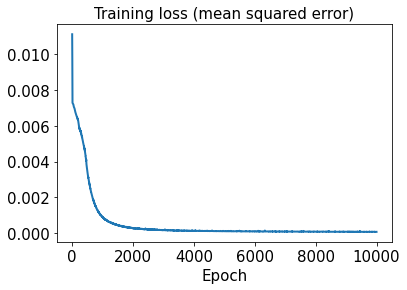

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

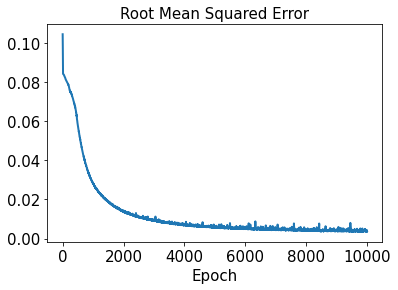

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

7/7 [==============================] - 0s 2ms/step - loss: 6.4087e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0012330095


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0066686464


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0011094923, 0.0011688275, 0.0011794125, 0.0010887666, 0.0018907582, 0.00082441117, 0.0013683565, 0.0012025271, 0.0020341896, 0.0011195901, 0.00096360035, 0.0020636278, 0.0013989265, 0.0005826527, 0.0011264154, 0.0009948697, 0.0010751571, 0.0007429937, 0.0009212431, 0.001194282, 0.0011916674, 0.0010490654, 0.0014003319, 0.0011607856, 0.0015914447, 0.0008948589, 0.0021631934, 0.0017418498, 0.00182959, 0.0008707879, 0.0013483578, 0.0017563564, 0.0016037577, 0.0016975637, 0.00072377955, 0.0011509259, 0.00226424, 0.001433167, 0.0014584339, 0.0006927788, 0.0009942835, 0.0006746987, 0.0013360899, 0.0010100193, 0.0014731513, 0.0006683868, 0.0010763841, 0.0013487726, 0.0010697378, 0.0008234935, 0.00054961804, 0.0020371962, 0.0016431253, 0.0024879007, 0.0015852007, 0.0009982028, 0.0011579617, 0.00088704244, 0.000848313, 0.0009385463, 0.0010537178, 0.0017691072, 0.0013578995, 0.0019528379, 0.00074886857, 0.0010030841, 0.0009364211, 0.0014619534, 0.0013904151, 0.0010383995, 0.0006166337, 0.0013

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.003925129, 0.0052569224, 0.006246169, 0.007803523, 0.004681938, 0.011868772, 0.01072543, 0.007626794, 0.0045949556, 0.005377021, 0.010412296, 0.005513723, 0.0061723837, 0.0033214553, 0.0059015225, 0.005506584, 0.0077684848, 0.012481019, 0.0060303654, 0.0076278136, 0.005706206, 0.005368812, 0.002898528]


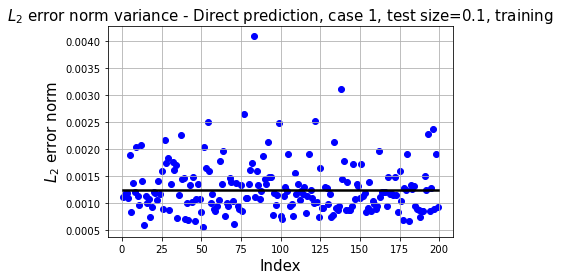

In [42]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 1, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

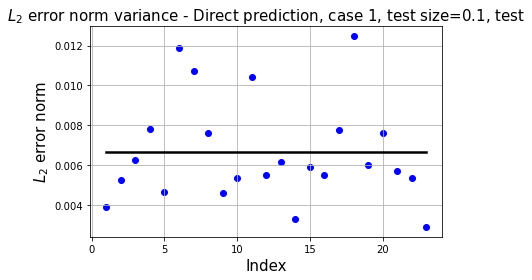

In [43]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 1, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

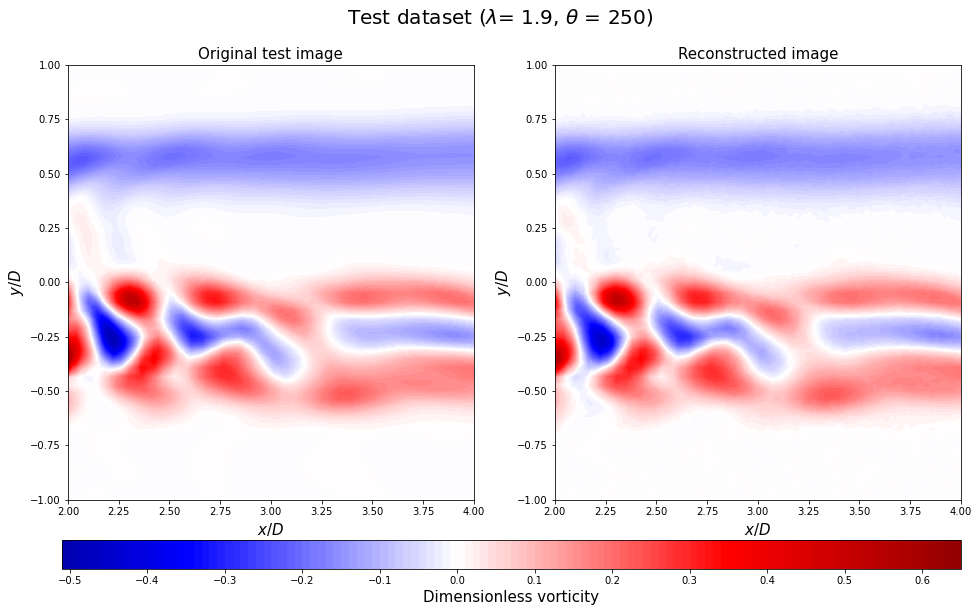

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

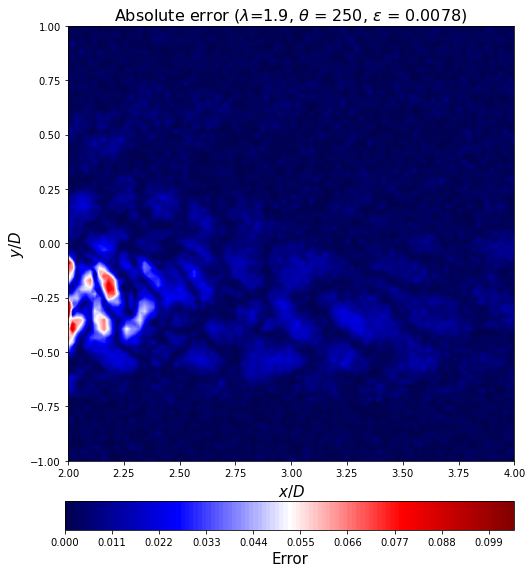

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()